In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

In [27]:
# Importing the dataset
dataset = pd.read_csv('mpg.csv')


dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
## no se encontraron datos anomalos y se procede con la estadistica descriptiva
##la estadistica descriptiva se hace con la funcion de .describe en lugar de utilizar excel para encontrarlos
#analisis multivariado
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
#analisis multivariado


In [30]:
'''
Pregunta2
    usar el random state 1234
    
    ¿Cuál es la variable dependiente? 
    R/ seria la variable MPG que representa miles per galon.
     ¿Cuáles son las variables independientes? 
    R/ seria el resto de variables los cilindros el displacement, caballos de fuerza, el peso , la aceleracion, el año del modelo
    su origen y el nombre del vehiculo
    ¿Existen variables categóricas?  ¿Cuáles?
    Si existen y serian las variables de los cilindros debido a que la poblacion cae en un rango de posibilidades, y el año del modelo.

    
    
'''


X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



'''
¿Qué algoritmo(s) va a utilizar para su modelo? El modelo de regresion lineal debido a que se adapta de mejor manera al dataset 
que nos fue presentado, y se decidio utilizar la variable displacement debido a un articulo en el que explica "Why engine 
displacement matters
Engine displacement is a determining factor in the horsepower and torque that an engine produces, as well 
as how much fuel that engine consumes.""
'''
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

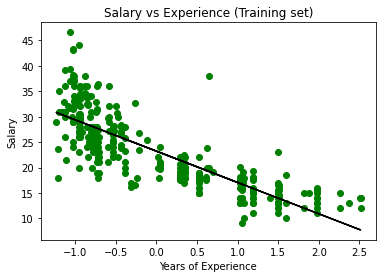

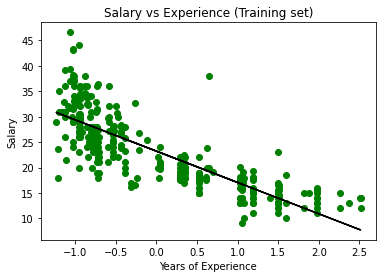

In [31]:
#aqui se graficara los resultados tanto del training set como de el test set de el modelo de regresion lineal
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [32]:
'''
3. Significanza de las variables
'''
model = sm.ols(formula='mpg ~ cylinders', data=dataset).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.6
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.31e-80
Time:                        13:48:16   Log-Likelihood:                -1179.3
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     390   BIC:                             2371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9155      0.835     51.404      0.000      41.274      44.557
cylinders     -3.5581      0.146    -24.425      0.000      -3.844      -3.272
==============================================================================
Omnibus:                       38.938   Durbin-Watson:                   1.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.615
Skew:                           0.699   Prob(JB):                     1.38e-12
Kurtosis:                       4.179   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model = sm.ols(formula='mpg ~ displacement', data=dataset).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.66e-90
Time:                        13:48:16   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = sm.ols(formula='mpg ~ horsepower', data=dataset).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           7.03e-81
Time:                        13:48:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model = sm.ols(formula='mpg ~ weight', data=dataset).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 05 Mar 2021   Prob (F-statistic):          6.02e-102
Time:                        13:48:16   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model = sm.ols(formula='mpg ~ acceleration', data=dataset).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.78e-18
Time:                        13:48:16   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model = sm.ols(formula='mpg ~ origin', data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     183.1
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.81e-34
Time:                        13:48:16   Log-Likelihood:                -1285.8
No. Observations:                 392   AIC:                             2576.
Df Residuals:                     390   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8120      0.716     20.676      0.000      13.404      16.220
origin         5.4765      0.405     13.531      0.000       4.681       6.272
==============================================================================
Omnibus:                       26.546   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.323
Skew:                           0.678   Prob(JB):                     2.60e-07
Kurtosis:                       3.138   Cond. No.                         4.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""